In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
# selecting features
X = df.drop('price', axis = 1)
y = df['price']

# data encoding
numerical_columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

X[numerical_columns] = StandardScaler().fit_transform(X[numerical_columns])
X[categorical_columns] = OrdinalEncoder().fit_transform(X[categorical_columns])

X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,1.403419,1.421812,1.378217,1.0,0.0,0.0,0.0,1.0,1.517692,1.0,0.0
1,1.757010,1.403419,5.405809,2.532024,1.0,0.0,0.0,0.0,1.0,2.679409,0.0,0.0
2,2.218232,0.047278,1.421812,0.224410,1.0,0.0,1.0,0.0,0.0,1.517692,1.0,1.0
3,1.083624,1.403419,1.421812,0.224410,1.0,0.0,1.0,0.0,1.0,2.679409,1.0,0.0
4,1.046726,1.403419,-0.570187,0.224410,1.0,1.0,1.0,0.0,1.0,1.517692,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.0,0.0,1.0,0.0,0.0,1.517692,0.0,2.0
541,-1.268613,0.047278,-0.570187,-0.929397,0.0,0.0,0.0,0.0,0.0,-0.805741,0.0,1.0
542,-0.705921,-1.308863,-0.570187,-0.929397,1.0,0.0,0.0,0.0,0.0,-0.805741,0.0,2.0
543,-1.033389,0.047278,-0.570187,-0.929397,0.0,0.0,0.0,0.0,0.0,-0.805741,0.0,0.0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# evaluating model
y_pred = model.predict(X_test)

r2 = f'{r2_score(y_test, y_pred):.2f}'
mse = f'{mean_squared_error(y_test, y_pred):.2f}'

r2, mse

('0.66', '1255520897405.56')

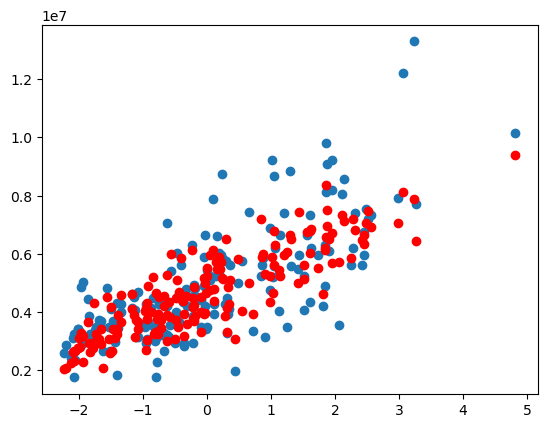

In [29]:
pca = PCA(n_components=1)

pca1 = pca.fit_transform(X_test).squeeze()

plt.scatter(pca1, y_test)
plt.scatter(pca1, y_pred, color = 'red')